# **TASK 2.1 - Fisher Iris Dataset**

There are totally 150 samples for 3 species. 
There are 4 features namely petal width,petal length,sepal width and sepal length (all in cm).
In Iris_lables, there are 150 elements which consists of 0, 1 and 2 and each counts to 5.
 0, 1 and 2 represents the name of the species.
**0-Iris-setosa**, **1-Iris-versicolor and 2-Iris-virginica.**

In [36]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn.cluster import KMeans
import scipy.stats
data = np.load('/content/Iris_data.npy')
labels = np.load('/content/Iris_labels.npy')
datas = np.load('/content/task2_4.npy')

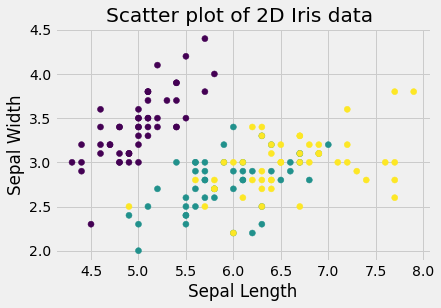

In [71]:
#Creating a scatter plot
a = plt. scatter ( data[:,0] , data[:,1],c=labels)

#Giving axis name
plt. xlabel ('Sepal Length')
plt. ylabel ('Sepal Width')

plt. title ('Scatter plot of 2D Iris data ')
plt. show () 

# **TASK 2.2-Clustering Iris Data set using Kmeans**

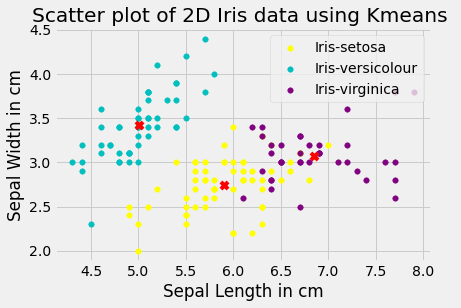

In [67]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 50, n_init = 10, random_state = 0)

#Fitting Kmeans model to Iris data and predicting the cluster membership
y_kmeans = kmeans.fit_predict(data)         
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 30, c = 'c', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 30, c = 'purple', label = 'Iris-virginica')

#Adding centroids to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red',marker = 'x')

#Giving axis name
plt. xlabel ('Sepal Length in cm') 
plt. ylabel ('Sepal Width in cm')  
plt. title ('Scatter plot of 2D Iris data using Kmeans ')
plt.legend(loc ="upper right")
plt.show()

init = Method for initialization, default is kmeans ++ (selects initial cluster centers for k-mean clustering in a smart way to speed up convergence)

n_init (default is 10) Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

# **TASK 2.3-Clustering using GMM**

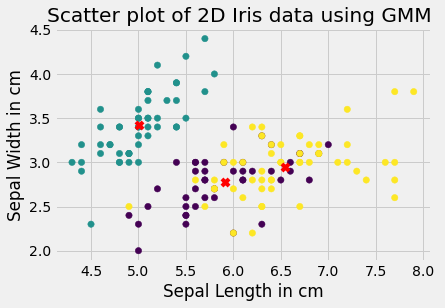

In [60]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 3,random_state=0,max_iter=100, n_init=10,init_params='kmeans',covariance_type='full')

#fit the GMM model to Iris data
gmm = gmm.fit(data)

# predict the clustering labels for the dataset
pred_gmm = gmm.predict(data)

#producing scatter plot of prediction by adding G means to the model
plt.scatter(data[:,0], data[:,1],c =pred_gmm, s=40 )

# plotting centroids of the clusters 
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=50, c='r', marker='x')

#predicting posterior possibility for data points
post_prob = gmm.predict_proba(data)
post_prob.round(3)
plt. xlabel ('Sepal Length in cm') #Giving axis name
plt. ylabel ('Sepal Width in cm')  #Giving axis name
plt. title ('Scatter plot of 2D Iris data using GMM ')
plt.show()

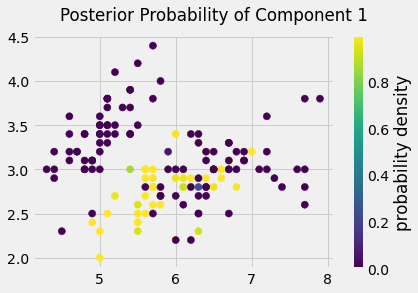

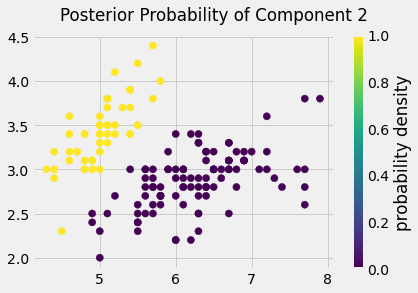

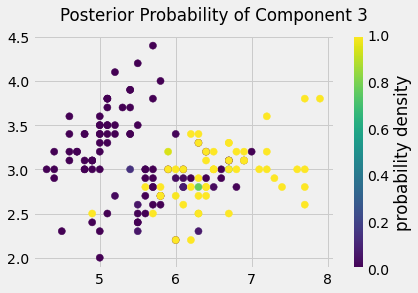

In [65]:
#Posterior Probability of Component 1
fig = plt.figure()
probability_class_1 = gmm.predict_proba(data)[:, 0]
plt.scatter(data[:,0], data[:,1], c=probability_class_1, s=50, cmap='viridis') 
cbar = plt.colorbar()
cbar.set_label("probability density")
fig.suptitle('Posterior Probability of Component 1')
plt.show()

#Posterior Probability of Component 2
fig = plt.figure()
probability_class_2 = gmm.predict_proba(data)[:, 1]
plt.scatter(data[:,0], data[:,1], c=probability_class_2, s=50, cmap='viridis') 
cbar = plt.colorbar()
cbar.set_label("probability density")
fig.suptitle('Posterior Probability of Component 2')
plt.show()

#Posterior Probability of Component 3
fig = plt.figure()
probability_class_3 = gmm.predict_proba(data)[:, 2]
plt.scatter(data[:,0], data[:,1], c=probability_class_3, s=50, cmap='viridis') 
cbar = plt.colorbar()
cbar.set_label("probability density")
fig.suptitle('Posterior Probability of Component 3')
plt.show()

init_params used to initialize the weights, the means and the precisions and the default is Kmeans, we can also use random where it's randomly initialized

# **TASK 2.4**

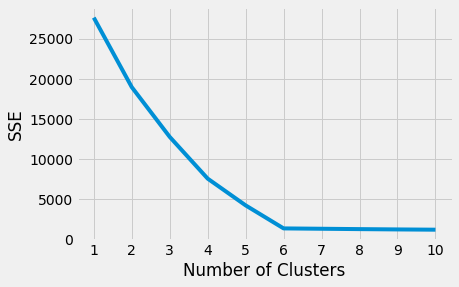

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

 # using Elbow Method to know the number of underlying clusters
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, init= "random", n_init=10, max_iter=300, random_state=42)
   kmeans.fit(datas)
   sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Number of clusters in task2_4 data set is 6** and this can be achieved by using Elbow method and below is the code to implement and cluster using GMM

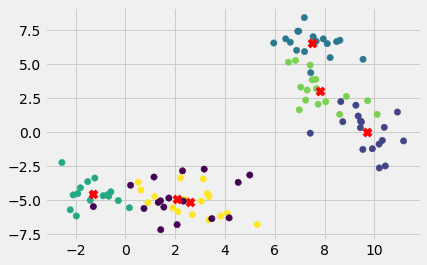

In [42]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 6,random_state=0,max_iter=100, n_init=20,covariance_type='full')

#fit the GMM model to Iris data
gmm = gmm.fit(datas)

# predict the clustering labels for the dataset
pred_gmm = gmm.predict(datas)

#producing scatter plot of prediction by adding G means to the model
plt.scatter(datas[:,0], datas[:,1],c =pred_gmm, s=40 )

# plotting centroids of the clusters 
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=50, c='r', marker='x')

#predicting posterior possibility for data points
plt.show()